In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
import missingno
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [5]:
file_name ='/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Belt2_A_drugtype_v2_final.csv'
df = pd.read_csv(file_name)
df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


In [6]:
#check data types
df.dtypes

Age            float64
Gender          object
BP              object
Cholesterol     object
Na_to_K         object
Drug            object
dtype: object

**Check for and address any impossible values in numeric columns**

In [7]:
# Replace a value in a column using replace() method
df['Na_to_K'].replace('10.403_', '10.403', inplace=True)


**Ensure data types match the data types listed in the data dictionary.**

In [61]:
df.dtypes

Age            float64
Gender          object
BP              object
Cholesterol     object
Na_to_K         object
Drug            object
dtype: object

In [8]:
df['Na_to_K'] = df['Na_to_K'].astype(float)
# Check the data types of the DataFrame
print("\nData Types after Conversion:")
print(df.dtypes)



Data Types after Conversion:
Age            float64
Gender          object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


**Check for and address any inconsistent values in categorical columns**

In [9]:
# Replace a value in a column using replace() method
df['Gender'].replace('female', 'F', inplace=True)
df['Gender'].replace('femal', 'F', inplace=True)


In [10]:
# Replace a value in a column using replace() method
df['Cholesterol'].replace('NORM', 'NORMAL', inplace=True)

**Check for missing values. You should produce an output that shows the number of missing values for each feature**

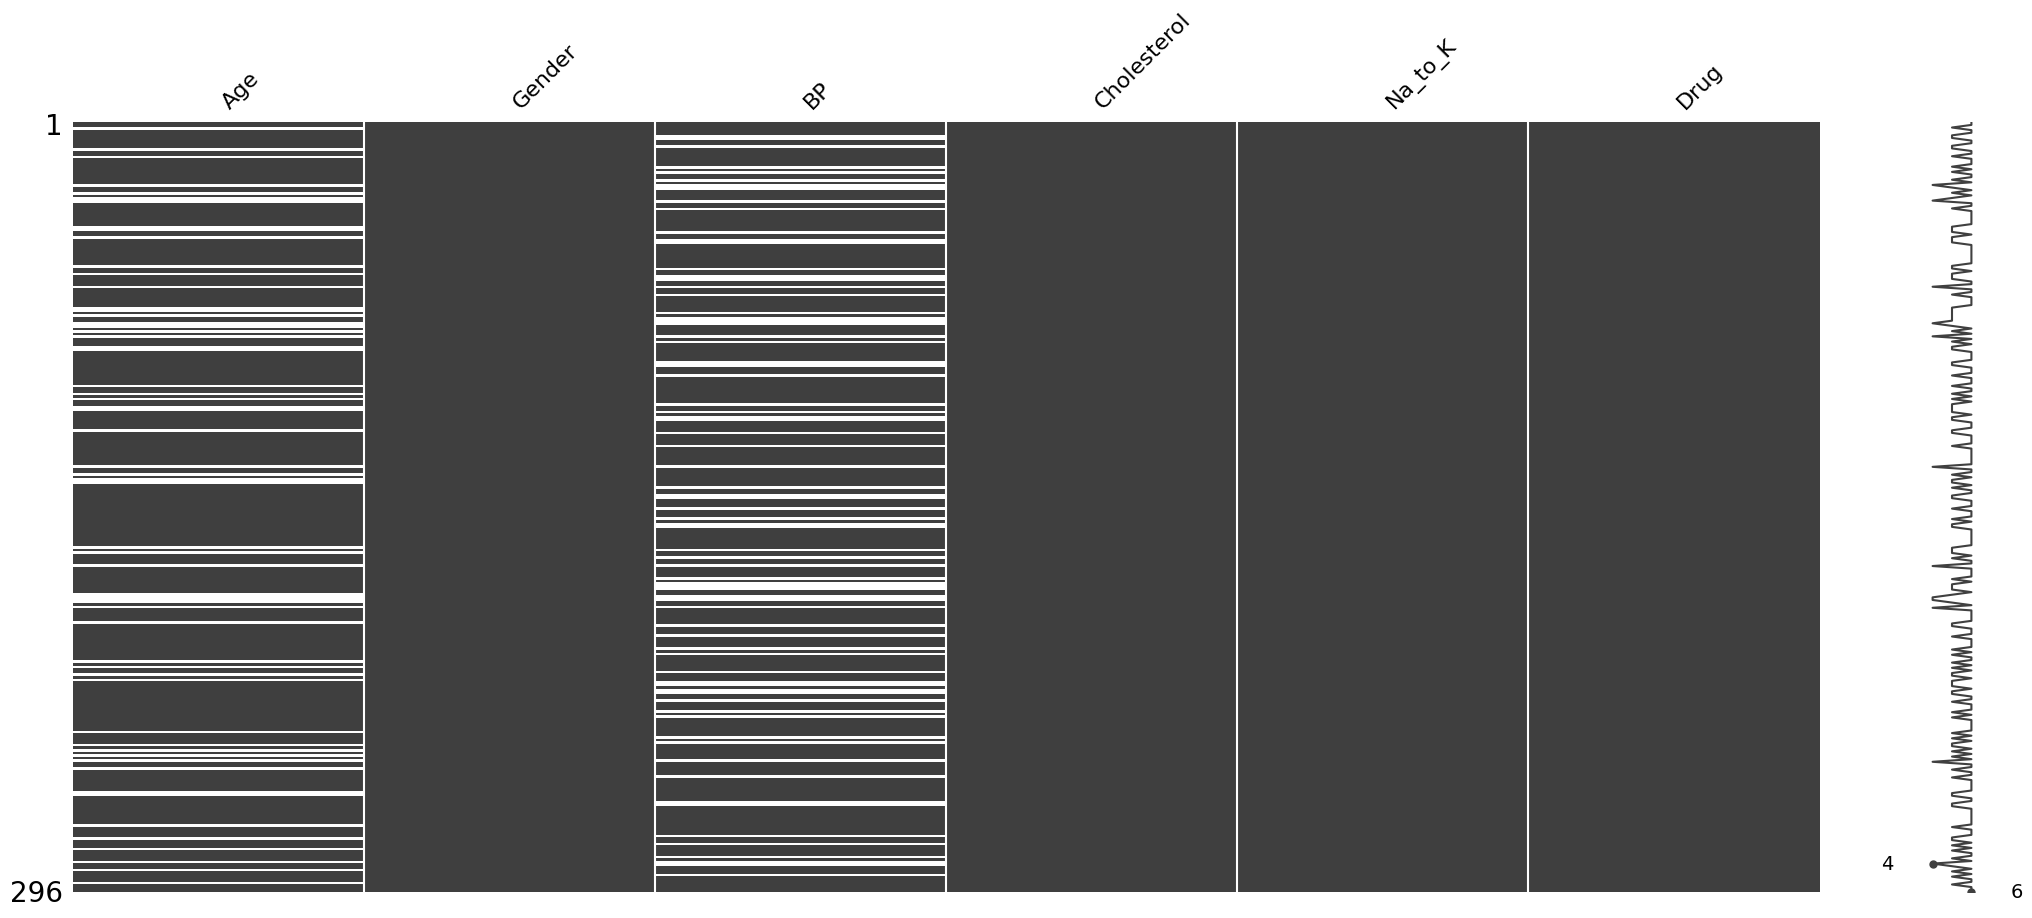

In [11]:
# Plot missing values
msno.matrix(df)
plt.show()

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Age            59
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64


In [13]:
df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


In [14]:
# Impute missing values with the median in each column
numeric_col = df.select_dtypes('number').columns
for column in numeric_col:
    numeric_imputer = df[column].median()  # Get the median value in the column
    df[column].fillna(numeric_imputer, inplace=True)

In [15]:
#list of categorical columns
caterogical_col = df.select_dtypes('object').columns
# Impute missing values with the most common value in each column
for column in caterogical_col:
    categorical_imputer = df[column].mode()[0]  # Get the most common value in the column
    df[column].fillna(categorical_imputer, inplace=True)

In [16]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Age            0
Gender         0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


<Axes: >

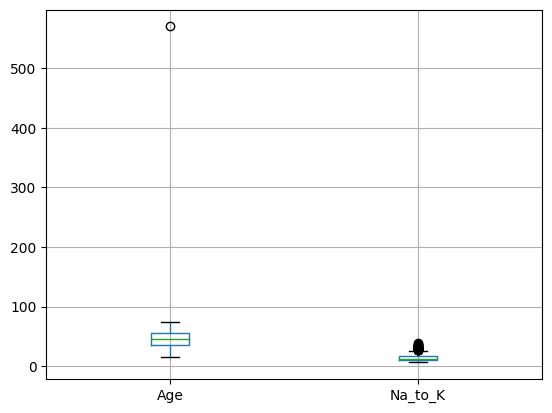

In [17]:
df.boxplot()

In [19]:
# Save list of numeric columns
num_cols = df.select_dtypes('number').columns
# Constructing numeric preprocesssing objects
num_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
num_pipe = make_pipeline(num_imputer, scaler)
num_tuple = ('num',num_pipe, num_cols)
num_tuple



('num',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Age', 'Na_to_K'], dtype='object'))

In [20]:
# split in to train and test
target = 'Drug'
X = df.drop(columns=target)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Custom mapping
custom_mapping = {'Low': 0,'Normal':1 ,'High': 2}
#transform train data
encoded_data_custom=X_train['BP'] = X_train['BP'].replace(custom_mapping)
#transform test data
#encoded_data_custom_test=X_train['BP'] = X_test['BP'].replace(custom_mapping)

print("Encoded data (custom mapping):", encoded_data_custom)


Encoded data (custom mapping): 63     2
17     2
215    2
219    2
183    2
      ..
188    2
71     1
106    1
270    2
102    0
Name: BP, Length: 236, dtype: int64


In [23]:
encoded_data_custom_test=X_test['BP'].replace(custom_mapping)
encoded_data_custom_test


274    2
155    2
84     2
82     2
261    2
9      2
42     2
277    2
282    2
92     2
148    2
211    2
60     2
218    2
262    2
46     2
45     2
236    2
228    2
132    2
143    2
167    2
152    2
93     2
113    2
5      2
238    2
251    2
170    2
186    2
193    2
33     2
222    2
216    2
197    2
73     2
182    2
119    2
285    2
202    2
204    2
179    2
177    2
111    2
59     2
226    2
25     2
77     2
6      2
175    2
164    2
140    2
30     2
22     2
245    2
24     2
56     2
144    2
124    2
97     2
Name: BP, dtype: int64

In [24]:
# Custom mapping
custom_mapping = {'NORMAL':1 ,'HIGH': 2}
# Encode ordinal data using custom mapping
encoded_data_custom=X_train['Cholesterol'] = X_train['Cholesterol'].replace(custom_mapping)

print("Encoded data (custom mapping):", encoded_data_custom)

Encoded data (custom mapping): 63     2
17     2
215    1
219    2
183    2
      ..
188    2
71     2
106    2
270    2
102    1
Name: Cholesterol, Length: 236, dtype: object


In [25]:
print(X_train)

      Age Gender  BP Cholesterol  Na_to_K
63   45.0      F   2           2   13.303
17   44.0      F   2           2   12.894
215  31.0      M   2           1   10.292
219  61.0      F   2           2   18.043
183  45.0      M   2           2   13.972
..    ...    ...  ..         ...      ...
188  56.0      F   2           2   25.395
71   45.0      M   1           2   14.133
106  45.0      M   1           2   16.850
270  45.0      M   2           2   10.403
102  37.0      F   0           1   12.006

[236 rows x 5 columns]


In [30]:
#Create a OneHotEncoder for one-hot encoding the categorical columns.
# Identify categorical columns
categorical_columns = ['Gender']
#categorical_columns = df.select_dtypes(include=['object']).columns
# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False, drop='first')
# Fit and transform the encoder on the categorical columns
encoded_data = encoder.fit_transform(X_train[categorical_columns])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
encoded_df

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([X_train, encoded_df], axis=1)
df_encoded

# Drop the original categorical columns from the DataFrame
df_encoded.drop(categorical_columns, axis=1, inplace=True)

X_train = df_encoded
print("Original x_train_data:")
print(X_train)
print("\nEncoded x_train_data:")
print(df_encoded)

Original x_train_data:
      Age  BP Cholesterol  Na_to_K  Gender_Femal  Gender_Female  Gender_M  \
63   45.0   2           2   13.303           0.0            0.0       0.0   
17   44.0   2           2   12.894           0.0            0.0       0.0   
215  31.0   2           1   10.292           0.0            0.0       1.0   
219  61.0   2           2   18.043           0.0            0.0       0.0   
183  45.0   2           2   13.972           0.0            0.0       1.0   
..    ...  ..         ...      ...           ...            ...       ...   
188  56.0   2           2   25.395           0.0            0.0       0.0   
71   45.0   1           2   14.133           0.0            0.0       1.0   
106  45.0   1           2   16.850           0.0            0.0       1.0   
270  45.0   2           2   10.403           0.0            0.0       1.0   
102  37.0   0           1   12.006           0.0            0.0       0.0   

     Gender_Male  Gender_male  
63           0.0    

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
print(X_train)

      Age  BP Cholesterol  Na_to_K  Gender_Femal  Gender_Female  Gender_M  \
63   45.0   2           2   13.303           0.0            0.0       0.0   
17   44.0   2           2   12.894           0.0            0.0       0.0   
215  31.0   2           1   10.292           0.0            0.0       1.0   
219  61.0   2           2   18.043           0.0            0.0       0.0   
183  45.0   2           2   13.972           0.0            0.0       1.0   
..    ...  ..         ...      ...           ...            ...       ...   
188  56.0   2           2   25.395           0.0            0.0       0.0   
71   45.0   1           2   14.133           0.0            0.0       1.0   
106  45.0   1           2   16.850           0.0            0.0       1.0   
270  45.0   2           2   10.403           0.0            0.0       1.0   
102  37.0   0           1   12.006           0.0            0.0       0.0   

     Gender_Male  Gender_male  
63           0.0          0.0  
17         